<a href="https://colab.research.google.com/github/aseempurohit/test-aseem/blob/master/DSAI_Univariate_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Analysis-I

# Problem Statement

The dataset includes various types of features that can be categorised into demographic (e.g., Age, Sex), social (e.g., SibSp, Parch), and economic indicators (e.g., Pclass, Fare, Embarked). Perform a univariate analysis of the Titanic dataset to explore the individual characteristics of passengers, such as age distribution, passenger class composition, gender ratio, and survival rates. The objective is to understand the general patterns and trends within each variable.

# Key Variables for Analysis:

## Dependent Variable / Target Variable:
- Survived (whether a passenger survived or not)

## Independent Variables / Predictor Variables:
- Pclass (Passenger class: socio-economic status)
- Sex (Gender)
- Age (Age of the passenger in years)
- SibSp (Number of siblings/spouses aboard)
- Parch (Number of parents/children aboard)
- Fare (The amount paid by the passenger for the ticket)
- Embarked (Port of embarkation)

### Assessing structure of the dataset

In [ ]:
#Import necessary libraries
import numpy as np      # Aggregations and calculations
import pandas as pd     #Tabular form of data and for EDA
import matplotlib.pyplot as plt     #For visualization
import seaborn as sns               #For visualization
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
#We can see the documentation of any function by running the same function followed by '?'
#pd.read_csv?

In [ ]:
#import os
#os.getcwd()

In [ ]:
df=pd.read_csv('/content/titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Count of rows and columns in the data
df.shape

(891, 12)

In [ ]:
#To get the list of variables/features,
#along with the count of available data in each variable, and the data type of each variable.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [ ]:
df.sample(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
568,569,0,3,"Doharr, Mr. Tannous",male,NaN,0,0,2686,7.2292,NaN,C


### Data Preprocessing

In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Used to calculate the percentage of missing values in each column
df.isnull().mean()*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
#Used to calculate the count of missing values in each column
df.isnull().sum()

In [ ]:
#Dropping the column "Cabin"
df=df.drop("Cabin",axis=1)

In [ ]:
df.isnull().mean()

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


<Axes: xlabel='Age', ylabel='Count'>

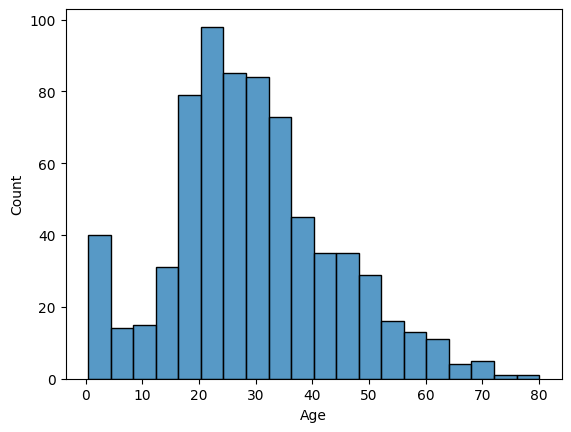

In [ ]:
#Create histogram to see the distribution of the data
sns.histplot(df['Age'])

In [ ]:
# We check for the skewness of the data so that we replace the missing values with an appropriate metric
df['Age'].skew()

np.float64(0.38910778230082704)

-1 ------------------- -0.5  ------------------- 0 ------------------- +0.5 ------------------- +1

- If skewness value is approx -0.3 or lesser (left side) or +0.3 or higher (right side), then impute the missing values with median.

- If skewness value is between -0.3 and +0.3, then impute the missing values with mean, as this range of skewness suggests that the data is normally distributed.


In [ ]:
#Age column is filled with the median of the column to avoid any biases caused by extreme values
df["Age"]=df["Age"].fillna(df["Age"].median())

In [ ]:
#Checking for null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


After dropping `Cabin`, the proportion of missing values is checked again.
Missing values in the `Age` column are filled with the median of the column to avoid any biases caused by extreme values.


Since port of embarkation does not help significantly to determine if passenger could survive or not, hence we can either delete the rows with missing data in embarked, or replace with Mode of value since it is categorical data.

In [ ]:
# Remaining rows with any missing values are dropped with
df=df.dropna()

In [ ]:
#If the column was important for the analysis, then alternatively use the command below to impute missing values.
Mode_Embarked = df['Embarked'].mode()
print(Mode_Embarked)
#df = df['Embarked'].fillna(Mode_Embarked)
#df['Embarked'] = df['Embarked'].fillna('S')

#We can even replace null values with 'unknown' in case of categorical data, instead of deleting the rows.
#df = df['Embarked'].fillna('Unknown')

In [ ]:
#Verify that all missing values have been successfully removed
df.isnull().mean()

,0
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


In [ ]:
# View the cleaned dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.shape

(889, 11)

In [ ]:
#Check the number of unique values for each feature to better understand categorical and continuous variables
df.nunique()

In [ ]:
df.nunique?

In [ ]:
#Confirm the new dimensions of the cleaned dataset
df.shape

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('titanic_dataset_cleaned.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

The cleaned version of the `Titanic` dataset with no missing values:

In [ ]:
# List of continuous (numerical) columns in the dataset
num_cols = ["Fare", "Age"]

# List of categorical columns in the dataset
# Survived, Pclass, Sex, SibSp, Parch, and Embarked are categorical variables
cat_cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

# List of identifier columns in the dataset
# These columns uniquely identify passengers but do not contribute to the analysis
id_cols = ["PassengerId", "Name", "Ticket"]

## Univariate Analysis

In [ ]:
#Gives the frequency counts of each category in the column
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


 The letters represent the port names (C = Cherbourg, Q = Queenstown, S = Southampton) - from the table, we can observe that most passengers boarded from the Southampton port, we can possibly conclude that the ship started its journey from the port Southampton.

Categorical variables consist of discrete categories, such as labels or groups. Common plots for categorical data include:

#### Barplot

<Axes: xlabel='Pclass'>

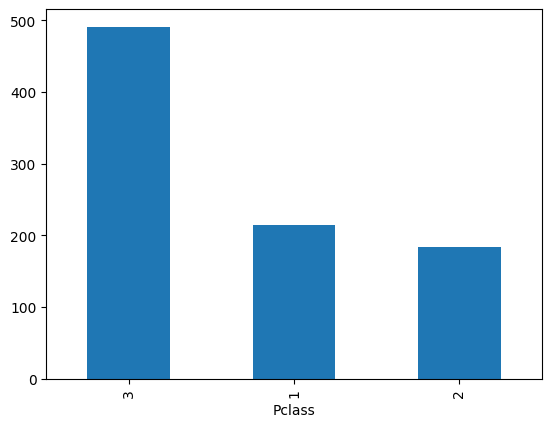

In [ ]:
df['Pclass'].value_counts().plot(kind='bar')

#Most passengers have taken the 3rd passenger class ticket.

<Axes: xlabel='SibSp'>

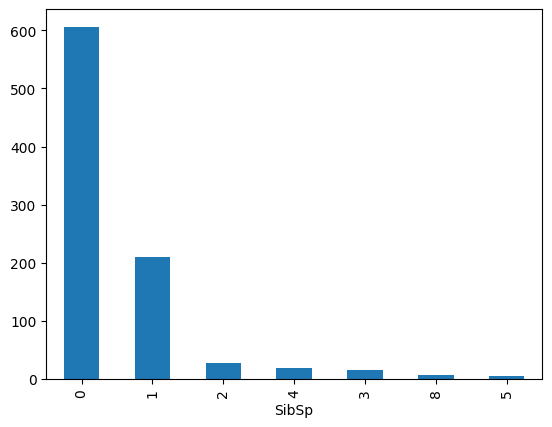

In [ ]:
df['SibSp'].value_counts().plot(kind='bar')

#Most of the passengers are not having either spouse or siblings on the ship.

<Axes: xlabel='Parch'>

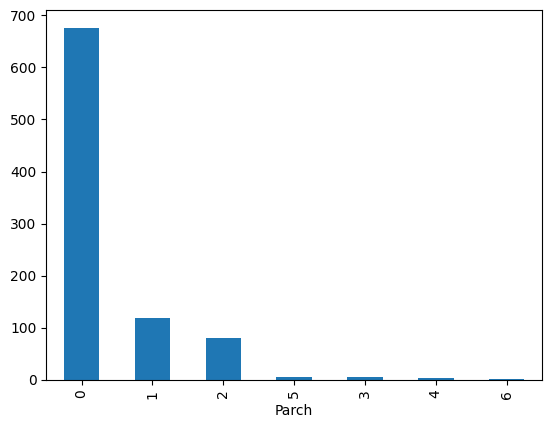

In [ ]:
df['Parch'].value_counts().plot(kind='bar')
# Most passengers have neither their parents nor children on the ship.

The bar plot provides a simple and clear visual representation of how many passengers belong to each passenger class (1st, 2nd, or 3rd).

It gives a clear overview of the passenger composition by class, indicating that 3rd class had the most passengers, which helps in understanding both the socio-economic diversity of the passengers and provides a potential link to survival analysis, as passenger class was a significant factor affecting survival.

#### Pie Chart

<Axes: ylabel='count'>

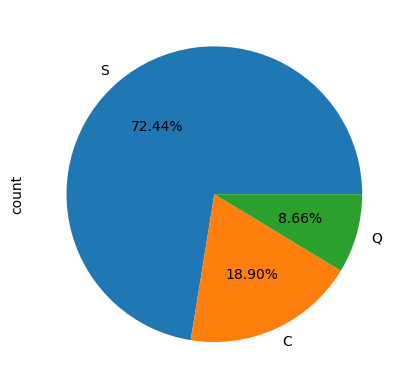

In [ ]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%1.2f%%')

#72.44% passengers from Southampton port, around 19% from Cherbourg port, and just 8.66% from Queenstown.

A pie chart is used for displaying the proportion of categories as parts of a whole. In this case, it helps you easily see the percentage of passengers that embarked from different ports (C = Cherbourg, Q = Queenstown, S = Southampton).

The autopct=`%1.1f%%` parameter automatically labels each slice with the percentage of the total, making it easy to interpret the data.

The chart's labels make it easy to see that the majority of passengers embarked from Southampton, which makes sense given that it was the ship's main point of origin.

#### Countplot

<Axes: xlabel='Embarked', ylabel='count'>

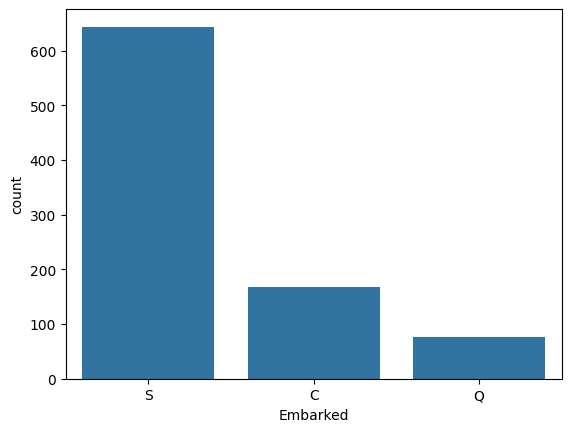

In [ ]:
sns.countplot(x=df["Embarked"])

For the Titanic dataset, `sns.countplot(x=df["Embarked"])` will display the count of passengers  embarked from different ports (C = Cherbourg, Q = Queenstown, S = Southampton).


The bar for Southampton (S) is typically the tallest, indicating that the majority of passengers boarded the Titanic at Southampton.

A count plot and a bar plot are similar in the sense that they are both used to visualise categorical data. A countplot counts the number of observations per category, while a barplot may sometimes estimates a summary statistic per category, such as the average.

Moving on, numerical data can either be continuous or discrete. The following plots are typically used for analysing the distribution and spread of continuous variables.

#### Kernel Density Plot

<Axes: ylabel='Density'>

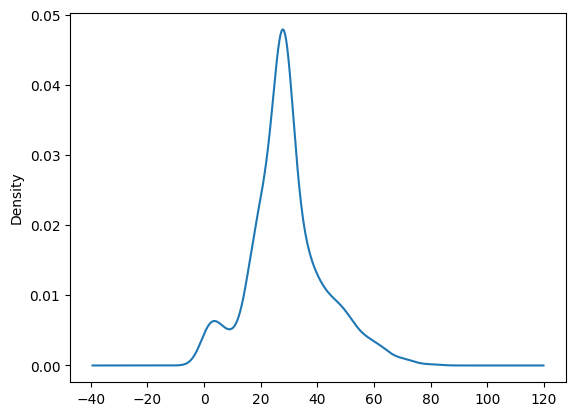

In [ ]:
df['Age'].plot(kind='kde')

#Most passengers are in the age group of 20 to 60 years.
#We also have a reasonably good number of children on the ship.

A KDE plot gives a smooth estimate of the **probability density function (PDF)** of the variable. It’s useful for understanding how the data is distributed in terms of where most values lie.

In this case, it shows the distribution of passenger's ages, helping identify age ranges where there are more passengers.

In the case of the Titanic dataset, the KDE plot for age generally shows a higher density for young adults (ages around 20-40), suggesting that this age group had the largest number of passengers.

In [ ]:
df['Age'].describe()

,Age
count,889.000000
mean,29.315152
std,12.984932
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


#### Histogram

It is used to see the bucket-wise distribution of a continuous variable.

Fare


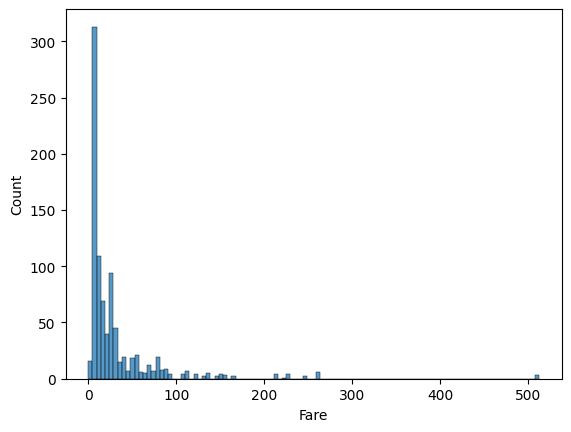

Age


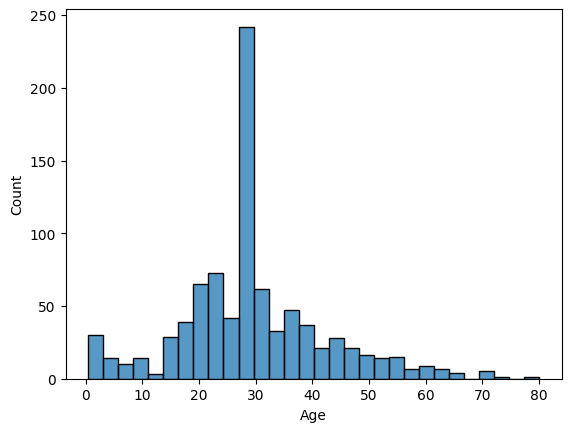

In [ ]:
# Looping through each column in the continuous columns list (cont_cols)
for i in num_cols:

    # Print the name of the current continuous column being processed
    print(i)

    # Plot a histogram for the current column using seaborn's histplot
    sns.histplot(df[i])

    # Display the plot after generating the histogram for the current column
    plt.show()

 The `Fare` histogram often displays a right-skewed distribution, with a majority of passengers paying lower fares and a few paying significantly higher fares.

The `Age` histogram typically displays a somewhat normal distribution, with a peak around $20-40$ years. This suggests that most passengers on the Titanic were young adults.

#### Boxplot

<Axes: ylabel='Fare'>

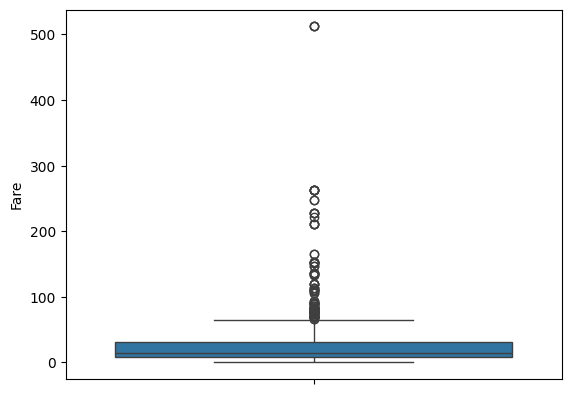

In [ ]:
sns.boxplot(df["Fare"])

#Only 3 passengers have paid a very high amount of more than $500 for the ticket. He is a premium passenger.

In [ ]:
df[df["Fare"] >500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


- It is used to see the quartile-wise distribution of a continuous variable.

- It is also used to see the outliers present in the data.

- Boxplots are also used to see the quartile-wise distribution of a continuous variable against categorical variables (e.g. distribution of sales across various categories).

Observations -

- Significant number of passengers paid
low fares, suggesting they were mostly third-class passengers.

- There are many outliers indicating high fare values, representing first-class passengers.

- The skewness in the boxplot highlights a disparity in ticket fares, with a small number of wealthy individuals paying significantly more compared to the rest of the passengers.

In [ ]:
df["Fare"].describe()

#Since 25% (25th percentile/1st quartile) for fare 7.89, we can say that 25% of the passengers paid $7.89 or lesser for the ticket.
#Since 50% (50th percentile/2nd quartile) for fare 14.45, we can say that 50% of the passengers paid $14.45 or lesser for the ticket.
#Since 75% (75th percentile/3rd quartile) for fare 31, we can say that 75% of the passengers paid $31 or lesser for the ticket.
#This also indicates positive skewness in the data, where more number of passengers are paying low fares for the tickets.

,Fare
count,889.000000
mean,32.096681
std,49.697504
min,0.000000
25%,7.895800
50%,14.454200
75%,31.000000
max,512.329200


#### Scatterplot

<Axes: ylabel='Age'>

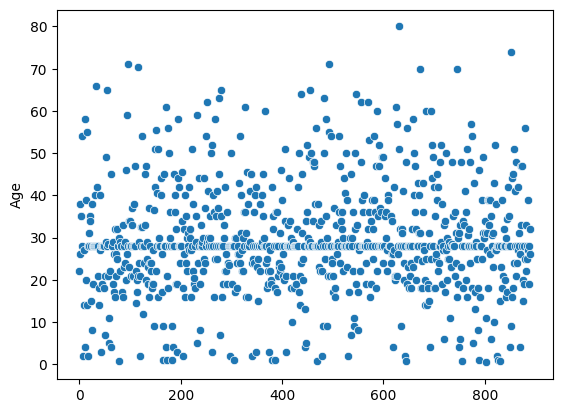

In [ ]:
sns.scatterplot(df["Age"])
#We can see more data concentration between the age group of 20 to 50 years,
#wherein a significantly good number of passengers are of age 28 years.

In [ ]:
df['Age'].mode()
df['Age'].value_counts().head()

,count
Age,
28.0,202
24.0,30
22.0,27
18.0,26
30.0,25


For the Titanic dataset, `sns.scatterplot(x=df["Age"])` will display the distribution of passengers across different age classes. Scatter plot is generally used for depicting relation between two numerical variables but it can also be used to plot a single numerical variable. It is also known as jittered dot plot.

The `x-axis` represents the index of the DataFrame, which is essentially the row number or the order of the passengers.
The `y-axis` represents the Age of each passenger, giving an overview of how passenger ages are distributed.


From the scatter plot, we can make the following observations:
- Young adults (ages $20-40$) make up the majority of the passengers, as indicated by the dense clustering of points.

- There are fewer passengers in the extreme age ranges (i.e., infants and elderly).